> #### **Heart Disease Detetion System**
This project aims to develop a Heart Disease Detection System using both
   - rule-based expert system (Experta)
   - machine learning model (Decision Tree Classifier in Scikit-Learn).
   
The system will analyze patient health indicators to predict heart disease risk. <br>
Additionally, it includes data preprocessing, visualization, and an organized folder structure to ensure clarity and usability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"..\data\heart.csv") # read our data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1024 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


> from this information we can say that:
   - All features is *int* except **(restecg, oldpeak)** are *float*
   - There are null values in **(restecg, oldpeak)** (1024, 1023)

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1024.000000,1025.000000,1025.000000,1023.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529297,149.114146,0.336585,1.072043,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527931,23.005724,0.472772,1.176008,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data_corr =  data.corr()
data_corr["target"].sort_values(ascending = False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.135484
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438289
Name: target, dtype: float64

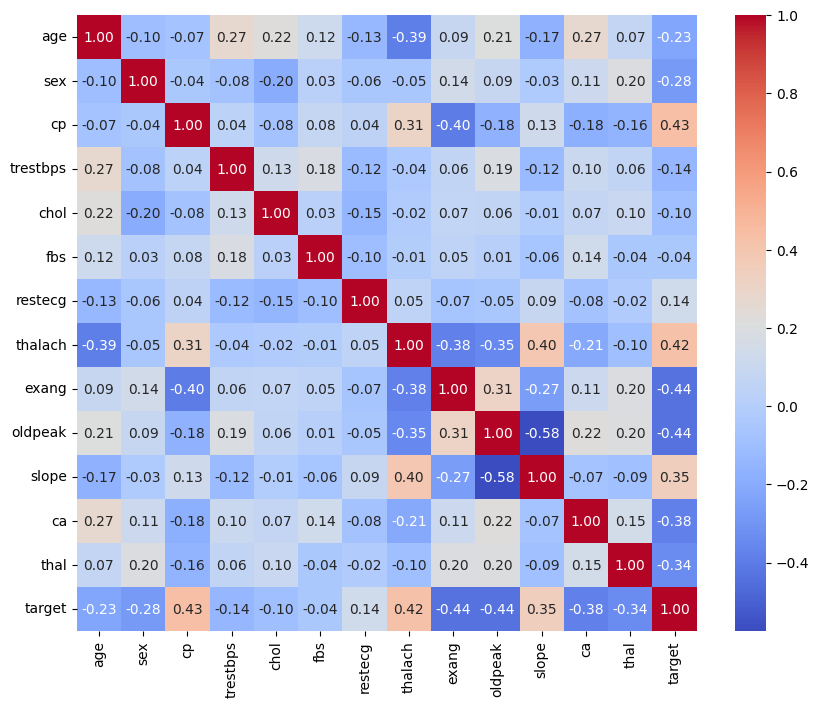

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [7]:
target_correlation = data_corr["target"].abs().sort_values(ascending=False)
selected_features = target_correlation[target_correlation > 0.3].index  
print("Efficted:", selected_features.tolist())

Efficted: ['target', 'oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal']


In [8]:
selected_features = target_correlation[target_correlation > 0].index  
print("Efficted:", selected_features.tolist())

Efficted: ['target', 'oldpeak', 'exang', 'cp', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age', 'trestbps', 'restecg', 'chol', 'fbs']


We can Recognized That : 

    1-> ['ca', 'slope', 'thal' ]  Have Good Effict on target

    2-> ['target', 'exang', 'oldpeak', 'cp', 'thalach'] Have more noticeable Effict on target
    
    3-> ['trestbps', 'restecg', 'chol', 'fbs'] have Low effict on target
    
    4-> ['sex', 'age'] have med effect on target

In [9]:
for col in data:
    Q1 = data[col].quantile(0.25)  
    Q3 = data[col].quantile(0.75) 
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers of {col} is = {len(outliers)}")

Outliers of age is = 0
Outliers of sex is = 0
Outliers of cp is = 0
Outliers of trestbps is = 30
Outliers of chol is = 16
Outliers of fbs is = 153
Outliers of restecg is = 0
Outliers of thalach is = 4
Outliers of exang is = 0
Outliers of oldpeak is = 7
Outliers of slope is = 0
Outliers of ca is = 87
Outliers of thal is = 7
Outliers of target is = 0


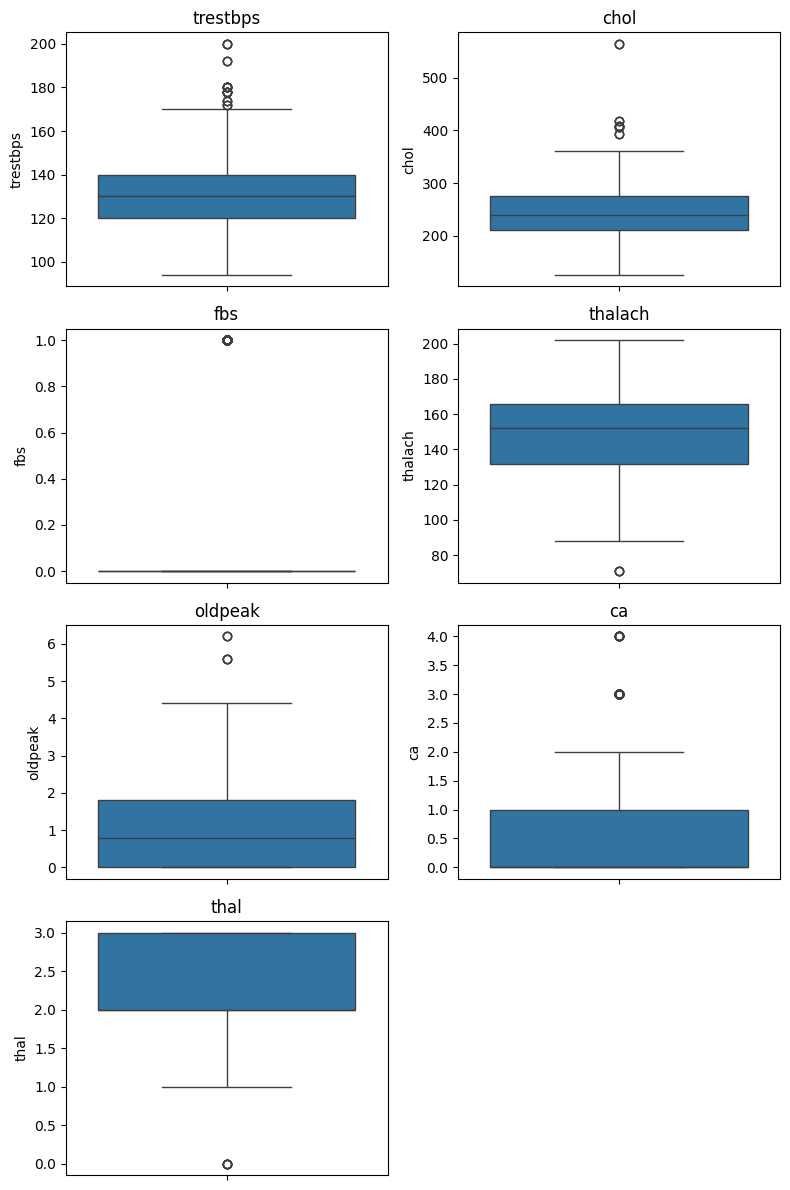

In [10]:
columns_with_outliers  = ["trestbps", "chol", "fbs", "thalach", "oldpeak", "ca", "thal"]

plt.figure(figsize=(8, 12))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(4,2, i)  
    sns.boxplot( y = data[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

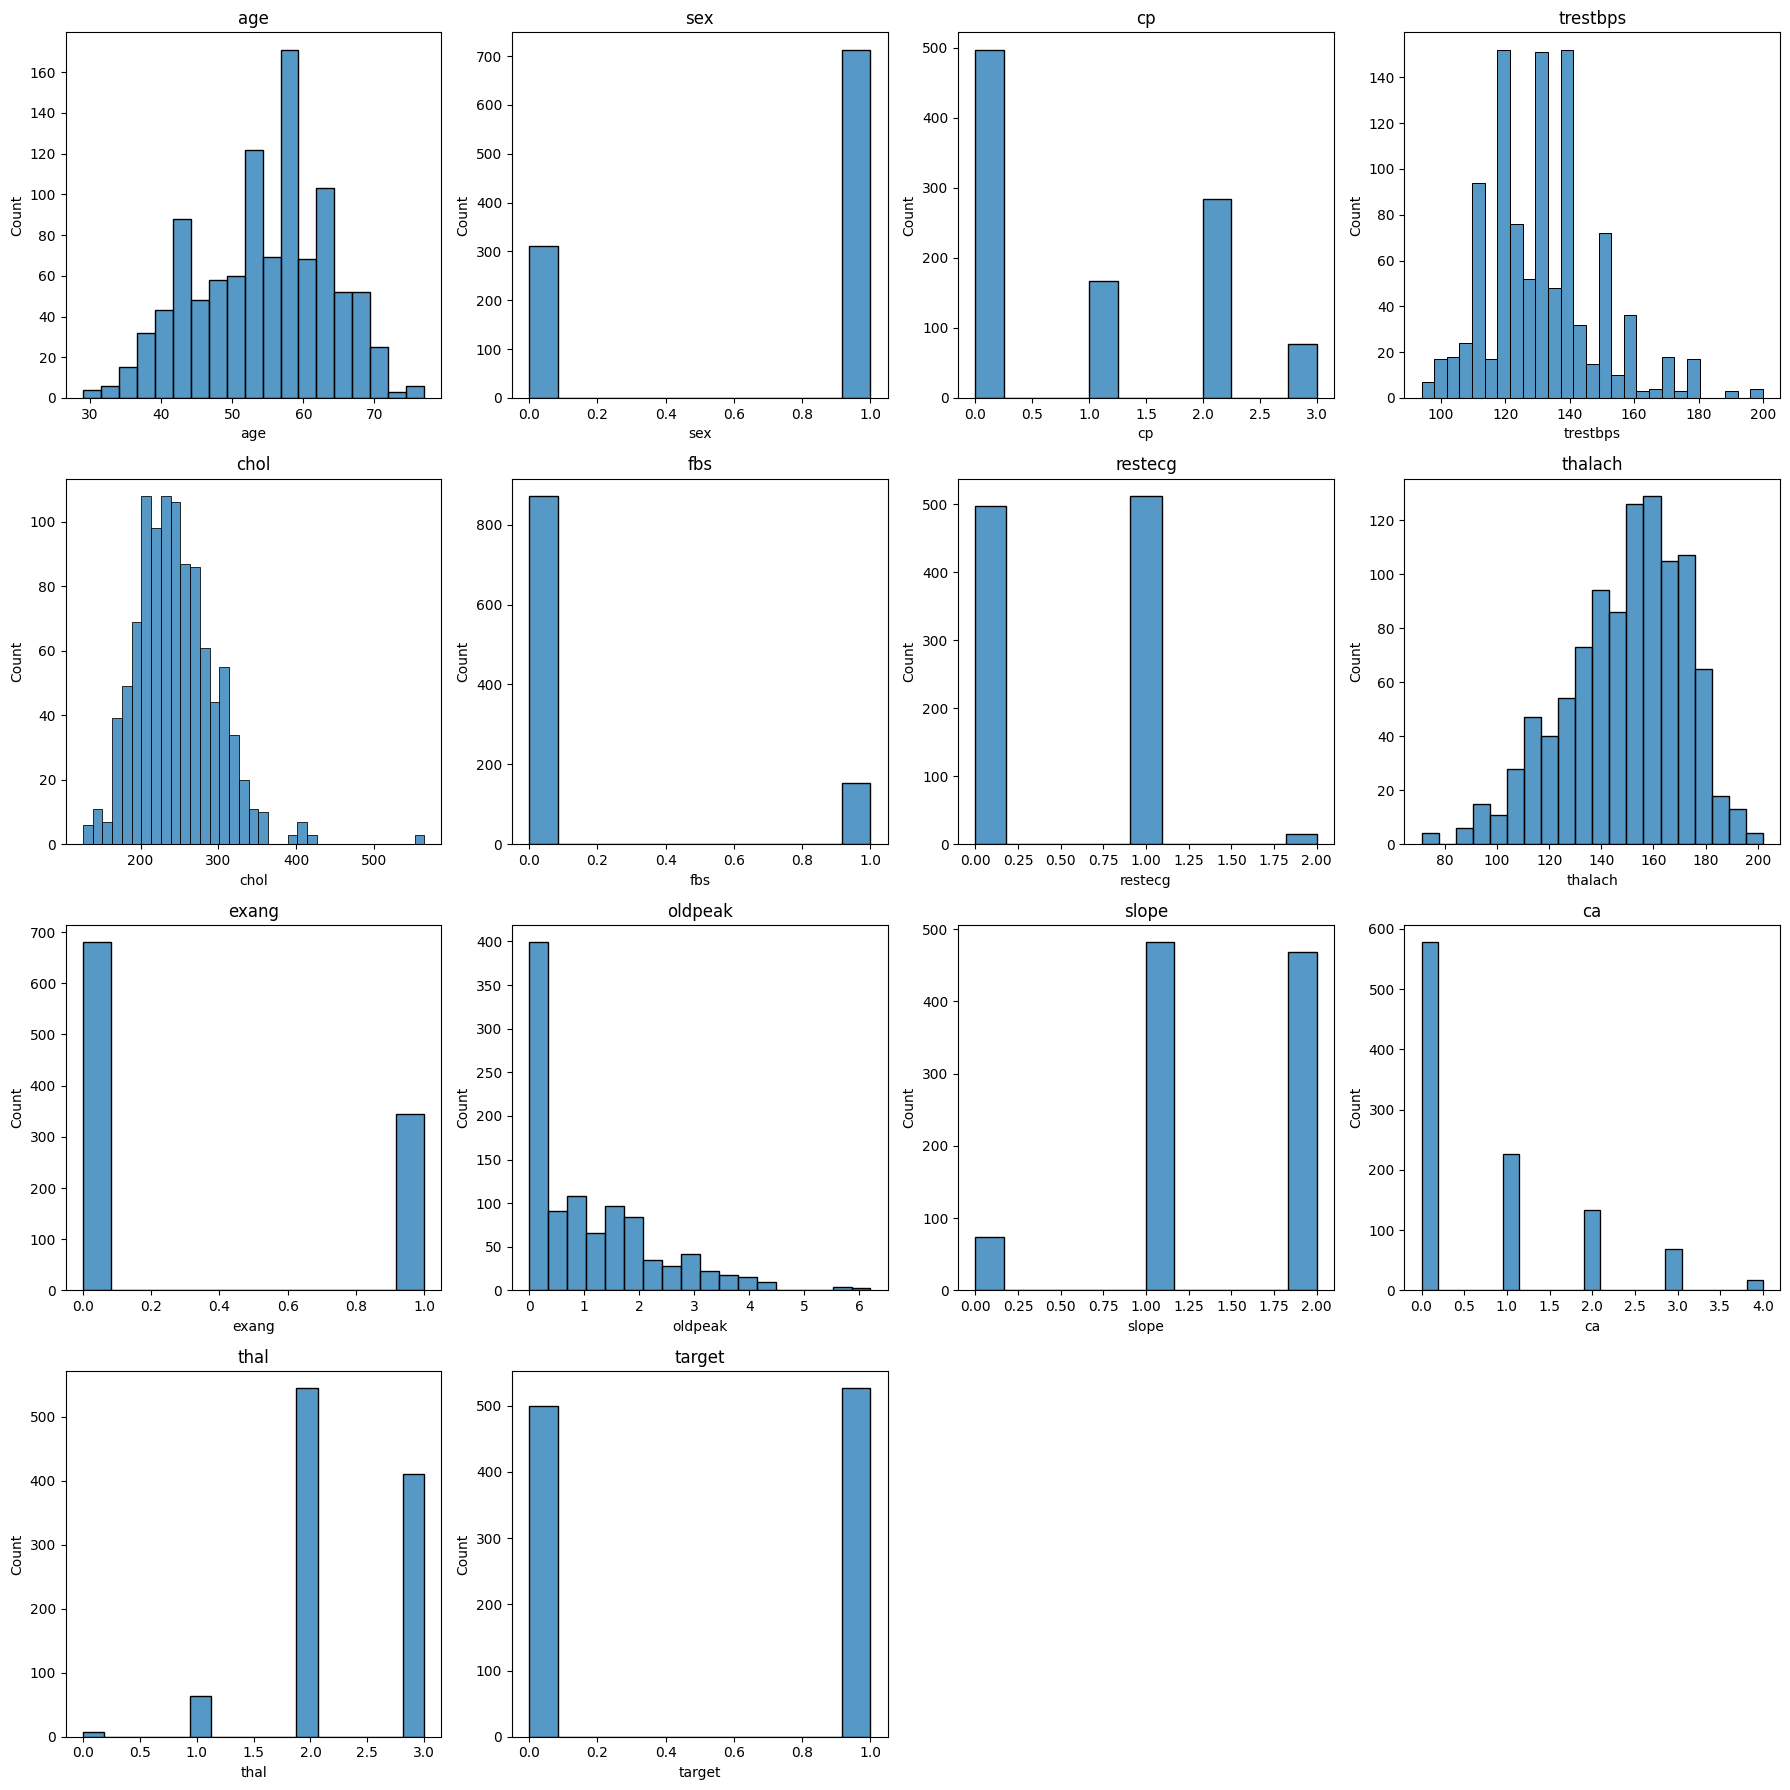

In [11]:
plt.figure(figsize=(18,18))
for i, col in enumerate(data, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(x=data[col])
    plt.title(col)
plt.tight_layout()  
plt.show()